In [144]:
%reload_ext rpy2.ipython

In [145]:
%%R

if (!require(gtrendsR)) install.packages("gtrendsR")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(ggforce)) install.packages("ggforce")
if (!require(ggrepel)) install.packages("ggrepel")
if (!require(cluster)) install.packages("cluster")
if (!require(klaR)) install.packages("klaR")
if (!require(dplyr)) install.packages("dplyr")
if (!require(eclust)) install.packages("eclust")
if (!require(NbClust)) install.packages("NbClust")
if (!require(factoextra)) install.packages("factoextra")
if (!require(readr)) install.packages("readr")
if (!require(knitr)) install.packages("knitr")
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(tidytext)) install.packages("tidytext")
if (!require(tidyr)) install.packages("tidyr")
if (!require(fpc)) install.packages("fpc")
if (!require(umap)) install.packages("umap")

In [146]:
%%R

library(gtrendsR)
library(tidyverse)
library(ggforce)
library(ggrepel)
library(cluster)
library(klaR)
library(dplyr)
library(eclust)
library(NbClust)
library(factoextra)
library(readr)
library(knitr)
library(ggplot2)
library(tidytext)
library(tidyr)
library(fpc)
library(umap)


In [147]:
%%R

games <- read.csv("Data/vgsales.csv", header = TRUE, na.strings = "N/A", colClasses = c("Global_Sales" = "numeric"))
head(games)

  Rank                     Name Platform Year        Genre Publisher NA_Sales
1    1               Wii Sports      Wii 2006       Sports  Nintendo    41.49
2    2        Super Mario Bros.      NES 1985     Platform  Nintendo    29.08
3    3           Mario Kart Wii      Wii 2008       Racing  Nintendo    15.85
4    4        Wii Sports Resort      Wii 2009       Sports  Nintendo    15.75
5    5 Pokemon Red/Pokemon Blue       GB 1996 Role-Playing  Nintendo    11.27
6    6                   Tetris       GB 1989       Puzzle  Nintendo    23.20
  EU_Sales JP_Sales Other_Sales Global_Sales
1    29.02     3.77        8.46        82.74
2     3.58     6.81        0.77        40.24
3    12.88     3.79        3.31        35.82
4    11.01     3.28        2.96        33.00
5     8.89    10.22        1.00        31.37
6     2.26     4.22        0.58        30.26


### Analiza podataka

In [148]:
%%R

# Count the number of games per platform
platform_counts <- games %>%
  group_by(Platform) %>%
  summarise(n = n(), .groups = "drop") %>%
  arrange(desc(n))

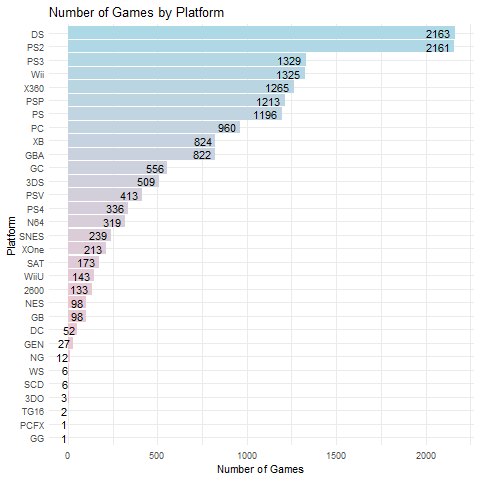

In [149]:
%%R

# Add a dummy variable for color gradient
platform_counts$color <- seq(1, nrow(platform_counts))

# Plot the data
ggplot(platform_counts, aes(x = reorder(Platform, n), y = n, fill = color)) +
  geom_bar(stat = "identity") +
  
  geom_text(aes(label=n), hjust=1.2, color="black") +  # Add value labels
  coord_flip() +
  scale_fill_gradient(low = "light blue", high = "pink") + 
  labs(x = "Platform", y = "Number of Games", title = "Number of Games by Platform") +
  theme_minimal() +
  theme(legend.position = "none")  # Remove legend for the color gradient

In [150]:
%%R

# Keep only the top 10 platforms
top_10_platforms <- platform_counts %>%
  slice_max(n, n = 10)

# Print the data
print(top_10_platforms)

# A tibble: 10 x 3
   Platform     n color
   <chr>    <int> <int>
 1 DS        2163     1
 2 PS2       2161     2
 3 PS3       1329     3
 4 Wii       1325     4
 5 X360      1265     5
 6 PSP       1213     6
 7 PS        1196     7
 8 PC         960     8
 9 XB         824     9
10 GBA        822    10


In [151]:
%%R

# Count the number of games per genre
genre_counts <- games %>%
  group_by(Genre) %>%
  summarise(n = n(), .groups = "drop") %>%
  arrange(desc(n))

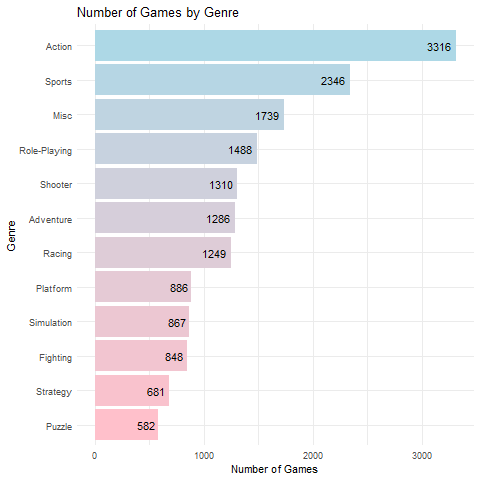

In [152]:
%%R

# Add a dummy variable for color gradient
genre_counts$color <- seq(1, nrow(genre_counts))

# Plot the data
ggplot(genre_counts, aes(x = reorder(Genre, n), y = n, fill = color)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=n), hjust=1.2, color="black") +  # Add value labels
  coord_flip() +
  scale_fill_gradient(low = "light blue", high = "pink") + 
  labs(x = "Genre", y = "Number of Games", title = "Number of Games by Genre") +
  theme_minimal() +
  theme(legend.position = "none")  # Remove legend for the color gradient

In [153]:
%%R

print(genre_counts)

# A tibble: 12 x 3
   Genre            n color
   <chr>        <int> <int>
 1 Action        3316     1
 2 Sports        2346     2
 3 Misc          1739     3
 4 Role-Playing  1488     4
 5 Shooter       1310     5
 6 Adventure     1286     6
 7 Racing        1249     7
 8 Platform       886     8
 9 Simulation     867     9
10 Fighting       848    10
11 Strategy       681    11
12 Puzzle         582    12


In [154]:
%%R

# Calculate total global sales per platform
platform_sales <- games %>%
  group_by(Platform) %>%
  summarise(total_sales = sum(Global_Sales, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(total_sales))

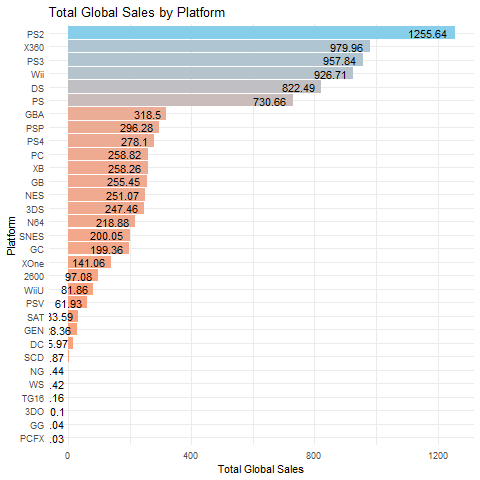

In [155]:
%%R

# Plot the data
ggplot(platform_sales, aes(x = reorder(Platform, total_sales), y = total_sales, fill = total_sales)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=total_sales), hjust=1.2, color="black") +  # Add value labels
  scale_fill_gradient(low = "LightSalmon", high = "SkyBlue") +
  coord_flip() +
  labs(x = "Platform", y = "Total Global Sales", title = "Total Global Sales by Platform") +
  theme_minimal() +
  theme(legend.position = "none") 

In [196]:
%%R

# Convert total_sales to numeric
platform_sales$total_sales <- as.numeric(platform_sales$total_sales)

print(n=31, platform_sales)

# A tibble: 31 x 2
   Platform total_sales
   <chr>          <dbl>
 1 PS2          1256.  
 2 X360          980.  
 3 PS3           958.  
 4 Wii           927.  
 5 DS            822.  
 6 PS            731.  
 7 GBA           318.  
 8 PSP           296.  
 9 PS4           278.  
10 PC            259.  
11 XB            258.  
12 GB            255.  
13 NES           251.  
14 3DS           247.  
15 N64           219.  
16 SNES          200.  
17 GC            199.  
18 XOne          141.  
19 2600           97.1 
20 WiiU           81.9 
21 PSV            61.9 
22 SAT            33.6 
23 GEN            28.4 
24 DC             16.0 
25 SCD             1.87
26 NG              1.44
27 WS              1.42
28 TG16            0.16
29 3DO             0.1 
30 GG              0.04
31 PCFX            0.03


In [193]:
%%R

# Keep only the top 10 platforms
top_10_platform_sales <- platform_sales %>%
  slice_max(total_sales, n = 10)

# Print the data
print(top_10_platform_sales)

# A tibble: 10 x 2
   Platform total_sales
   <chr>          <dbl>
 1 PS2            1256.
 2 X360            980.
 3 PS3             958.
 4 Wii             927.
 5 DS              822.
 6 PS              731.
 7 GBA             318.
 8 PSP             296.
 9 PS4             278.
10 PC              259.


In [230]:
%%R

# Calculate total global sales per genre
genre_sales <- games %>%
  group_by(Genre) %>%
  summarise(total_sales = sum(Global_Sales, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(total_sales))

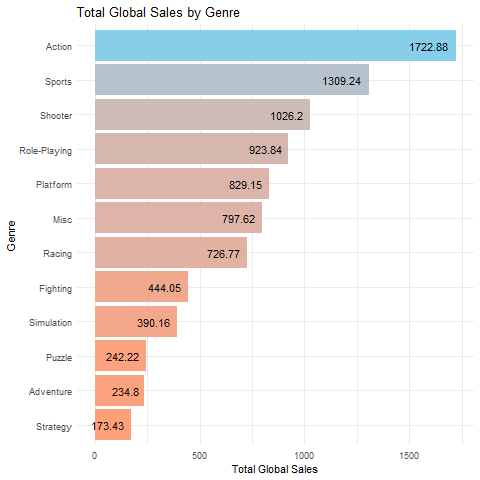

In [231]:
%%R

# Plot the data
ggplot(genre_sales, aes(x = reorder(Genre, total_sales), y = total_sales, fill = total_sales)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=total_sales), hjust=1.2, color="black") +  # Add value labels
  scale_fill_gradient(low = "LightSalmon", high = "SkyBlue") +
  coord_flip() +
  labs(x = "Genre", y = "Total Global Sales", title = "Total Global Sales by Genre") +
  theme_minimal() +
  theme(legend.position = "none") 

In [232]:
%%R

# Convert total_sales to numeric
genre_sales$total_sales <- as.numeric(genre_sales$total_sales)

print(genre_sales)

# A tibble: 12 x 2
   Genre        total_sales
   <chr>              <dbl>
 1 Action             1723.
 2 Sports             1309.
 3 Shooter            1026.
 4 Role-Playing        924.
 5 Platform            829.
 6 Misc                798.
 7 Racing              727.
 8 Fighting            444.
 9 Simulation          390.
10 Puzzle              242.
11 Adventure           235.
12 Strategy            173.


+  Top 10 izdavača na osnovu broja igara

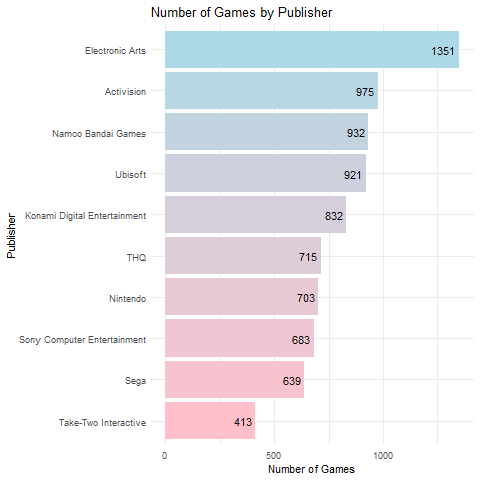

In [157]:
%%R

# Count the number of games per publisher
publisher_counts <- games %>%
  group_by(Publisher) %>%
  summarise(n = n(), .groups = 'drop') %>%
  arrange(desc(n)) %>%
  head(10)

# Add a dummy variable for color gradient
publisher_counts$color <- seq(1, nrow(publisher_counts))

# Plot the data
ggplot(publisher_counts, aes(x = reorder(Publisher, n), y = n, fill = color)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=n), hjust=1.2, color="black") +  # Add value labels
  coord_flip() +
  scale_fill_gradient(low = "light blue", high = "pink") + 
  labs(x = "Publisher", y = "Number of Games", title = "Number of Games by Publisher") +
  theme_minimal() +
  theme(legend.position = "none")  # Remove legend for the color gradient

In [158]:
%%R

print(publisher_counts)

# A tibble: 10 x 3
   Publisher                        n color
   <chr>                        <int> <int>
 1 Electronic Arts               1351     1
 2 Activision                     975     2
 3 Namco Bandai Games             932     3
 4 Ubisoft                        921     4
 5 Konami Digital Entertainment   832     5
 6 THQ                            715     6
 7 Nintendo                       703     7
 8 Sony Computer Entertainment    683     8
 9 Sega                           639     9
10 Take-Two Interactive           413    10


+ Top 10 izdavača na osnovu globalne prodaje

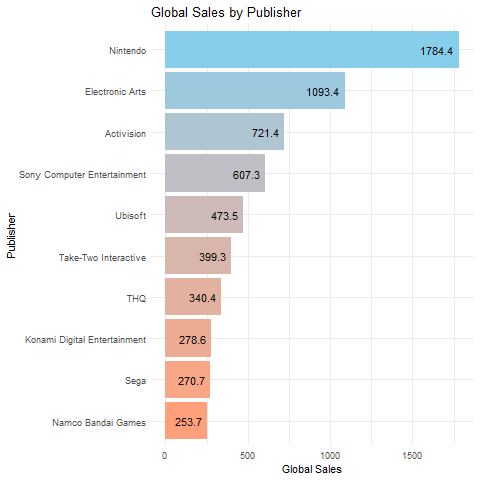

In [238]:
%%R

# Sum global sales per publisher
publisher_sales <- games %>%
  group_by(Publisher) %>%
  summarise(total_sales = sum(Global_Sales, na.rm = TRUE), .groups = 'drop') %>%
  arrange(desc(total_sales)) %>%
  head(10)

# Add a dummy variable for color gradient
publisher_sales$color <- seq(1, nrow(publisher_sales))

# Plot the data
ggplot(publisher_sales, aes(x = reorder(Publisher, total_sales), y = total_sales, fill = color)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label=round(total_sales, 1)), hjust=1.2, color="black") +  # Add value labels
  coord_flip() +
  scale_fill_gradient(low = "SkyBlue", high = "LightSalmon") + 
  labs(x = "Publisher", y = "Global Sales", title = "Global Sales by Publisher") +
  theme_minimal() +
  theme(legend.position = "none")  # Remove legend for the color gradient

In [160]:
%%R

print(publisher_sales)

# A tibble: 10 x 3
   Publisher                    total_sales color
   <chr>                              <dbl> <int>
 1 Nintendo                           1787.     1
 2 Electronic Arts                    1110.     2
 3 Activision                          727.     3
 4 Sony Computer Entertainment         608.     4
 5 Ubisoft                             475.     5
 6 Take-Two Interactive                400.     6
 7 THQ                                 341.     7
 8 Konami Digital Entertainment        284.     8
 9 Sega                                273.     9
10 Namco Bandai Games                  254.    10


### Klasterizacija
+ K-Means, Elbow method

+ Konverzija Global_Sales u kategoričku varijablu

In [239]:
%%R

summary(games$Global_Sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.0600  0.1700  0.5402  0.4800 82.7400 


In [240]:
%%R

# Define the bin thresholds
breaks <- c(-Inf, 0.06, 0.17, 0.47, 2, Inf)

# Add the Global_Sales_Category to the original data frame
labels <- c("Very Low", "Low", "Medium", "High", "Very High")

# Discretize 'Global_Sales' into bins
games$Global_Sales_Category <- cut(games$Global_Sales, breaks = breaks, labels = labels, include.lowest = TRUE)

# Print out the first few rows of the updated data frame to check the results
head(games)

  Rank                     Name Platform Year        Genre Publisher NA_Sales
1    1               Wii Sports      Wii 2006       Sports  Nintendo    41.49
2    2        Super Mario Bros.      NES 1985     Platform  Nintendo    29.08
3    3           Mario Kart Wii      Wii 2008       Racing  Nintendo    15.85
4    4        Wii Sports Resort      Wii 2009       Sports  Nintendo    15.75
5    5 Pokemon Red/Pokemon Blue       GB 1996 Role-Playing  Nintendo    11.27
6    6                   Tetris       GB 1989       Puzzle  Nintendo    23.20
  EU_Sales JP_Sales Other_Sales Global_Sales Global_Sales_Category cluster
1    29.02     3.77        8.46        82.74             Very High       8
2     3.58     6.81        0.77        40.24             Very High       8
3    12.88     3.79        3.31        35.82             Very High       8
4    11.01     3.28        2.96        33.00             Very High       8
5     8.89    10.22        1.00        31.37             Very High       8
6   

In [252]:
%%R

sales_ranges <- data.frame(
  Category = c("Very Low", "Low", "Medium", "High", "Very High"),
  Min = c(-Inf, 0.06, 0.17, 0.47, 2),
  Max = c(0.06, 0.17, 0.47, 2, Inf)
)

print(sales_ranges)

   Category  Min  Max
1  Very Low -Inf 0.06
2       Low 0.06 0.17
3    Medium 0.17 0.47
4      High 0.47 2.00
5 Very High 2.00  Inf


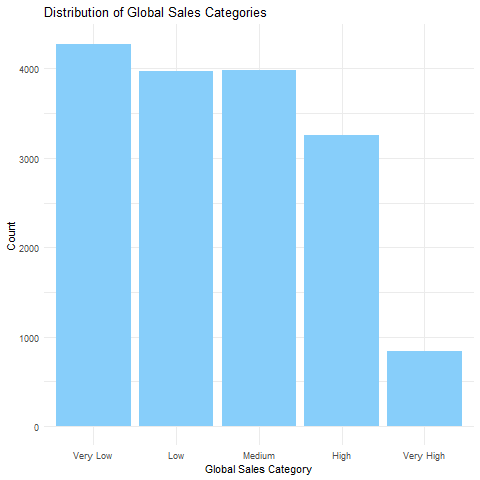

In [253]:
%%R

# Create a bar plot
ggplot(games, aes(x = Global_Sales_Category)) +
  geom_bar(fill = "LightSkyBlue") +
  theme_minimal() +
  xlab("Global Sales Category") +
  ylab("Count") +
  ggtitle("Distribution of Global Sales Categories")


In [261]:
%%R

# Count number of sales per sales category
sales_count <- table(games$Global_Sales_Category)

# Print the sales count
print(sales_count)


 Very Low       Low    Medium      High Very High 
     4277      3973      3985      3256       836 


In [254]:
%%R

# Select columns for clustering
clustering_data <- games %>%
  dplyr::select(Genre, Platform, Global_Sales)

# Convert categorical variables to factor
clustering_data$Genre <- as.numeric(as.factor(clustering_data$Genre))
clustering_data$Platform <- as.numeric(as.factor(clustering_data$Platform))

# Scale the data
clustering_data <- scale(clustering_data)

In [255]:
%%R

# Exclude rows with missing values
clustering_data <- na.omit(clustering_data)

# Scale the data
clustering_data <- scale(clustering_data)

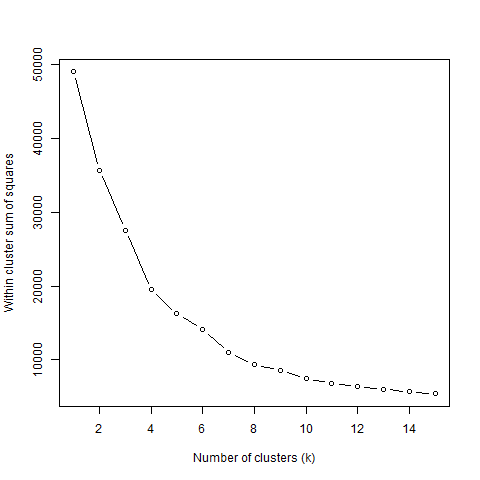

In [256]:
%%R

# Compute and plot wss for k = 1 to k = 15
wss <- map_dbl(1:15, function(k){
  model <- kmeans(clustering_data, centers = k, nstart = 25)
  model$tot.withinss
})

plot(1:15, wss, type = "b", xlab = "Number of clusters (k)", ylab = "Within cluster sum of squares")

In [168]:
%%R

# Optimal number of clusters=8
set.seed(123)  # for reproducibility
final_model <- kmeans(clustering_data, centers = 8, nstart = 25)

# Add the cluster assignments to the original data
games$cluster <- final_model$cluster

# Analyze the characteristics of each cluster
cluster_summary <- games %>%
  group_by(cluster) %>%
  summarise(
    count = n(),
    avg_global_sales = mean(Global_Sales, na.rm = TRUE),
    .groups = "drop"
  )

print(cluster_summary)

# A tibble: 8 x 3
  cluster count avg_global_sales
    <int> <int>            <dbl>
1       1  1842            0.326
2       2  2794            0.334
3       3  2059            0.443
4       4   339            6.16 
5       5  3597            0.356
6       6  1866            0.423
7       7  4078            0.411
8       8    23           28.0  


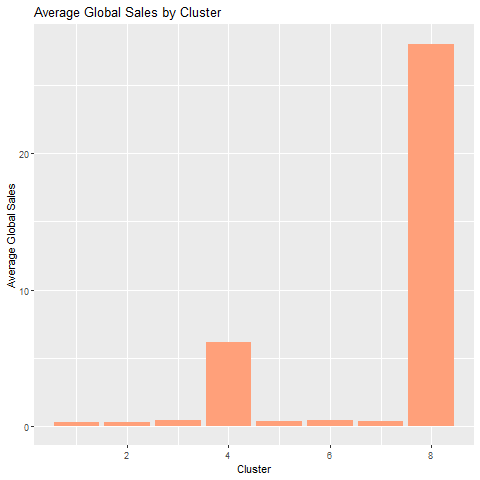

In [169]:
%%R

# Bar plot of average global sales by cluster
ggplot(cluster_summary, aes(x = cluster, y = avg_global_sales)) +
  geom_bar(stat = "identity", fill = "LightSalmon") +
  xlab("Cluster") +
  ylab("Average Global Sales") +
  ggtitle("Average Global Sales by Cluster")

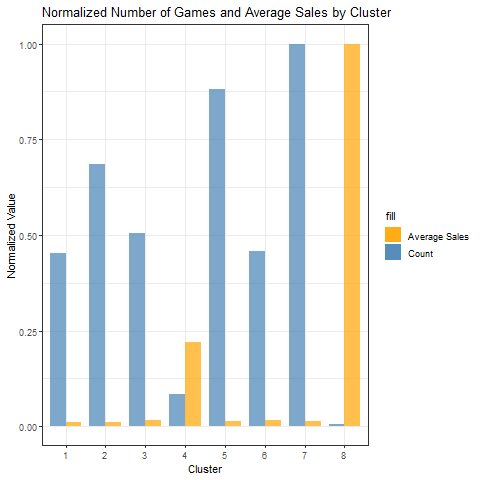

In [170]:
%%R

library(ggplot2)
library(dplyr)

# Normalize count and average sales within each cluster between 0 and 1
cluster_summary <- cluster_summary %>%
  mutate(
    count_normalized = scale(count, center = FALSE, scale = max(count)),
    avg_sales_normalized = scale(avg_global_sales, center = FALSE, scale = max(avg_global_sales))
  )

# Double bar plot of normalized count and normalized average sales by cluster
ggplot(cluster_summary) +
  geom_bar(aes(x = factor(cluster), y = count_normalized, fill = "Count"), stat = "identity", position = position_nudge(x = -0.2), width = 0.4, alpha = 0.7) +
  geom_bar(aes(x = factor(cluster), y = avg_sales_normalized, fill = "Average Sales"), stat = "identity", position = position_nudge(x = 0.2), width = 0.4, alpha = 0.7) +
  xlab("Cluster") +
  ylab("Normalized Value") +
  ggtitle("Normalized Number of Games and Average Sales by Cluster") +
  scale_fill_manual(values = c("Count" = "steelblue", "Average Sales" = "orange")) +
  theme_bw()


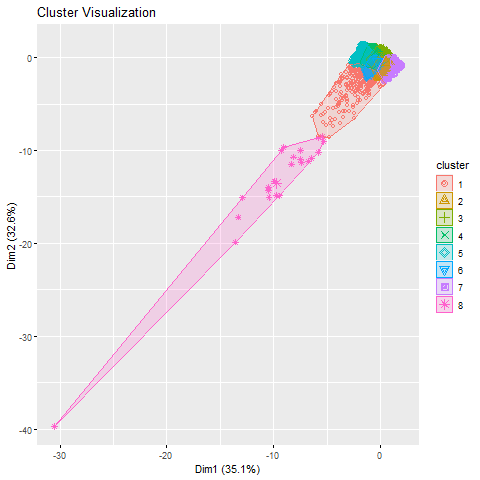

In [171]:
%%R

clustering_obj <- kmeans(clustering_data, centers = 8, nstart = 25)

# Visualize the clusters
fviz_cluster(clustering_obj, data = clustering_data, geom = "point", ellipse.type = "convex", ellipse.level = 0.5, main = "Cluster Visualization")


In [257]:
%%R

# Optimal number of clusters=5
set.seed(123)  # for reproducibility
final_model <- kmeans(clustering_data, centers = 4, nstart = 25)

# Add the cluster assignments to the original data
games$cluster <- final_model$cluster

# Analyze the characteristics of each cluster
cluster_summary <- games %>%
  group_by(cluster) %>%
  summarise(
    count = n(),
    avg_global_sales = mean(Global_Sales, na.rm = TRUE),
    .groups = "drop"
  )

print(cluster_summary)

# A tibble: 4 x 3
  cluster count avg_global_sales
    <int> <int>            <dbl>
1       1  4514            0.384
2       2    77           16.6  
3       3  6212            0.516
4       4  5524            0.471


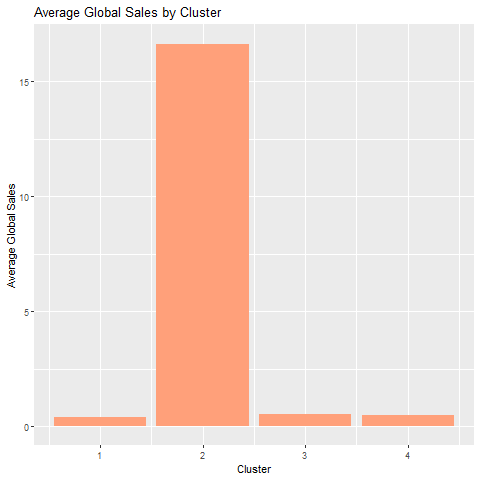

In [258]:
%%R

# Bar plot of average global sales by cluster
ggplot(cluster_summary, aes(x = cluster, y = avg_global_sales)) +
  geom_bar(stat = "identity", fill = "LightSalmon") +
  xlab("Cluster") +
  ylab("Average Global Sales") +
  ggtitle("Average Global Sales by Cluster")

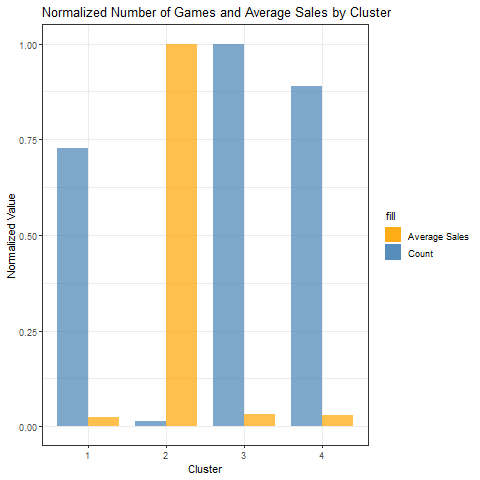

In [259]:
%%R

library(ggplot2)
library(dplyr)

# Normalize count and average sales within each cluster between 0 and 1
cluster_summary <- cluster_summary %>%
  mutate(
    count_normalized = scale(count, center = FALSE, scale = max(count)),
    avg_sales_normalized = scale(avg_global_sales, center = FALSE, scale = max(avg_global_sales))
  )

# Double bar plot of normalized count and normalized average sales by cluster
ggplot(cluster_summary) +
  geom_bar(aes(x = factor(cluster), y = count_normalized, fill = "Count"), stat = "identity", position = position_nudge(x = -0.2), width = 0.4, alpha = 0.7) +
  geom_bar(aes(x = factor(cluster), y = avg_sales_normalized, fill = "Average Sales"), stat = "identity", position = position_nudge(x = 0.2), width = 0.4, alpha = 0.7) +
  xlab("Cluster") +
  ylab("Normalized Value") +
  ggtitle("Normalized Number of Games and Average Sales by Cluster") +
  scale_fill_manual(values = c("Count" = "steelblue", "Average Sales" = "orange")) +
  theme_bw()

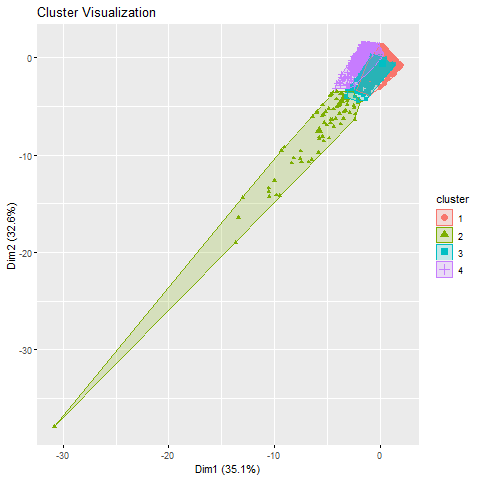

In [260]:
%%R

clustering_obj <- kmeans(clustering_data, centers = 4, nstart = 25)

# Visualize the clusters
fviz_cluster(clustering_obj, data = clustering_data, geom = "point", ellipse.type = "convex", ellipse.level = 0.5, main = "Cluster Visualization")

In [262]:
%%R
# Select columns for clustering
clustering_data <- games %>%
  dplyr::select(Genre, Platform, Global_Sales)

# Convert categorical variables to factor
clustering_data$Genre <- as.numeric(as.factor(clustering_data$Genre))
clustering_data$Platform <- as.numeric(as.factor(clustering_data$Platform))

# Exclude rows with missing values
clustering_data <- na.omit(clustering_data)


In [264]:
%%R

# Scale the data
clustering_data_scaled <- scale(clustering_data)

# Convert to data frame
clustering_data_scaled <- as.data.frame(clustering_data_scaled)

# Calculate z-scores for Global_Sales
z_scores <- abs(clustering_data_scaled$Global_Sales)

# Remove outliers: keep only rows with z-score less than 3
clustering_data_no_outliers <- clustering_data_scaled[z_scores <= 3, ]

In [266]:
%%R

# Run the kmeans on the clustering_data_no_outliers
final_model <- kmeans(clustering_data_no_outliers, centers = 8, nstart = 25)

# Add the cluster assignments to the original data
# This line will cause some inconsistencies because the outlier-removed data and the original data have different number of rows.
# games$cluster <- final_model$cluster

# Add cluster assignments to the non-outlier data instead
clustering_data_no_outliers$cluster <- final_model$cluster

In [267]:
%%R

# Analyze the characteristics of each cluster
cluster_summary <- clustering_data_no_outliers %>%
  group_by(cluster) %>%
  summarise(
    count = n(),
    avg_global_sales = mean(Global_Sales, na.rm = TRUE),
    .groups = "drop"
  )

print(cluster_summary)

# A tibble: 8 x 3
  cluster count avg_global_sales
    <int> <int>            <dbl>
1       1  1907          -0.105 
2       2  3217          -0.161 
3       3   449           1.81  
4       4  1899          -0.0700
5       5  1654          -0.153 
6       6  2673          -0.156 
7       7  2470          -0.117 
8       8  1879          -0.0996


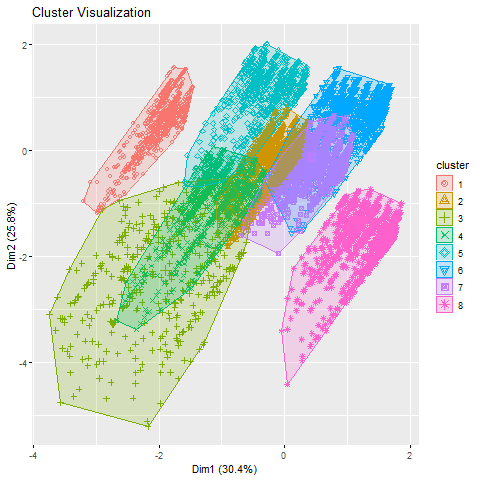

In [268]:
%%R

# Visualize the clusters
fviz_cluster(final_model, data = clustering_data_no_outliers, geom = "point", ellipse.type = "convex", ellipse.level = 0.5, main = "Cluster Visualization")

In [269]:
%%R

# Run the kmeans on the clustering_data_no_outliers
final_model <- kmeans(clustering_data_no_outliers, centers = 4, nstart = 25)

# Add the cluster assignments to the original data
# This line will cause some inconsistencies because the outlier-removed data and the original data have different number of rows.
# games$cluster <- final_model$cluster

# Add cluster assignments to the non-outlier data instead
clustering_data_no_outliers$cluster <- final_model$cluster

In [270]:
%%R

# Analyze the characteristics of each cluster
cluster_summary <- clustering_data_no_outliers %>%
  group_by(cluster) %>%
  summarise(
    count = n(),
    avg_global_sales = mean(Global_Sales, na.rm = TRUE),
    .groups = "drop"
  )

print(cluster_summary)

# A tibble: 4 x 3
  cluster count avg_global_sales
    <int> <int>            <dbl>
1       1  5406          -0.0417
2       2  2066           0.0921
3       3  4349          -0.110 
4       4  4327          -0.155 


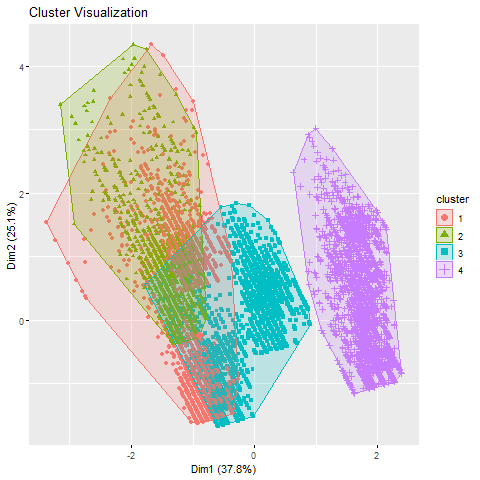

In [271]:
%%R

# Visualize the clusters
fviz_cluster(final_model, data = clustering_data_no_outliers, geom = "point", ellipse.type = "convex", ellipse.level = 0.5, main = "Cluster Visualization")

In [279]:
%%R

# Specify parameters eps (maximum distance between two samples) and MinPts (the number of samples in a neighborhood)
eps_value <- 0.1
minPts_value <- 8

In [280]:
%%R

# Apply DBSCAN
db <- fpc::dbscan(clustering_data_no_outliers, eps = eps_value, MinPts = minPts_value)

# Print the DBSCAN results
print(db)

dbscan Pts=16148 MinPts=8 eps=0.1
          0 1 2   3   4   5   6  7   8 9  10 11  12 13 14 15 16 17  18  19  20
border 2245 7 7   2   2   2   1  4   5 6   2  7   2  6  7  7  5  3   0   0   7
seed      0 1 1 213 359 288 335 10 306 2 192  1 128  2  3  1 12 66 129 232 315
total  2245 8 8 215 361 290 336 14 311 8 194  8 130  8 10  8 17 69 129 232 322
       21 22 23 24 25 26  27  28  29 30  31  32  33  34  35 36  37  38  39 40
border  6  6  3  6  6  4   0   2   0  6   1   0   1   5   2  7   2   1   2  2
seed    2  9 84  2  2  7 147 186 263  2 210 233 161 194 112  1 105 179 171 61
total   8 15 87  8  8 11 147 188 263  8 211 233 162 199 114  8 107 180 173 63
       41  42 43  44  45  46  47 48  49  50 51  52 53  54  55  56 57  58  59
border  1   1  3   1   1   1   3  3   0   2  2   2  2   1   1   1  6   4   0
seed   84 167 92 119 121 150 106 77 122 363 51 114 85 204 133 227  5 163 102
total  85 168 95 120 122 151 109 80 122 365 53 116 87 205 134 228 11 167 102
        60  61 62 63 64 65 66 

In [281]:
%%R

# Adding cluster assignments to the data
clustering_data_no_outliers$cluster <- db$cluster

# Analyze the characteristics of each cluster
cluster_summary <- clustering_data_no_outliers %>%
  group_by(cluster) %>%
  summarise(
    count = n(),
    avg_global_sales = mean(Global_Sales, na.rm = TRUE),
    .groups = "drop"
  )

print(cluster_summary)

# A tibble: 204 x 3
   cluster count avg_global_sales
     <dbl> <int>            <dbl>
 1       0  2245           0.644 
 2       1     8           1.31  
 3       2     8           0.892 
 4       3   215          -0.0469
 5       4   361          -0.0593
 6       5   290          -0.0667
 7       6   336          -0.0754
 8       7    14           0.640 
 9       8   311          -0.0866
10       9     8           0.675 
# i 194 more rows
# i Use `print(n = ...)` to see more rows


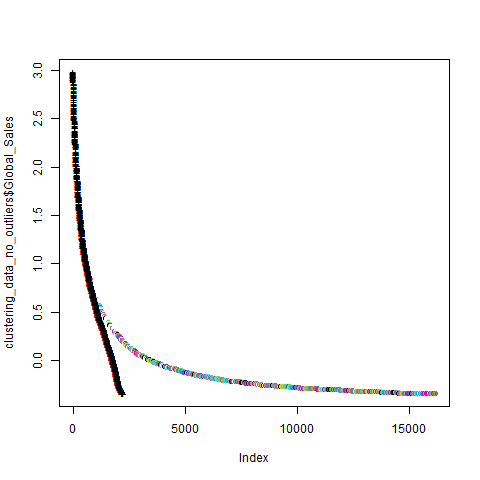

In [282]:
%%R

# Visualize the clusters
plot(clustering_data_no_outliers$Global_Sales, col=db$cluster)
points(clustering_data_no_outliers$Global_Sales[db$cluster==0], col="black", pch = "+") # Noise points are usually visualized differently

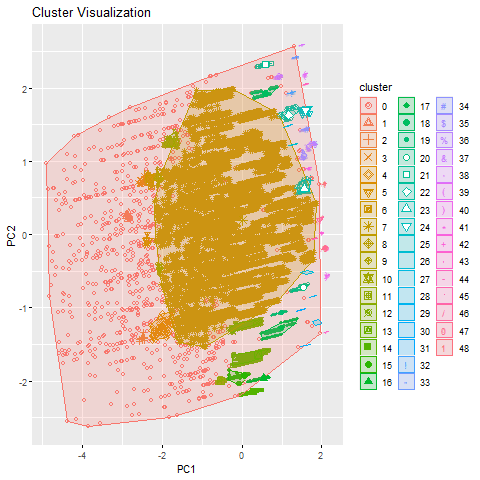

In [284]:
%%R

# Use PCA to reduce to 2 dimensions
pca <- prcomp(clustering_data_no_outliers, scale = TRUE)
pca_data <- as.data.frame(pca$x[, 1:2])  # take the first two principal components

# Apply DBSCAN
db <- fpc::dbscan(pca_data, eps = 0.1, MinPts = 8)

# Visualize the clusters
fviz_cluster(list(data = pca_data, cluster = db$cluster), 
             geom = "point", 
             ellipse.type = "convex", 
             ellipse.level = 0.95, 
             main = "Cluster Visualization")

### Prosječna prodaja prema regionu za žanrove

In [234]:
%%R

# Calculate average sales per region for each game genre
average_sales <- games %>%
    group_by(Genre) %>%
    summarise(
        avg_NA_Sales = mean(NA_Sales),
        avg_EU_Sales = mean(EU_Sales),
        avg_JP_Sales = mean(JP_Sales),
        avg_Other_Sales = mean(Other_Sales),
        avg_Global_Sales = mean(Global_Sales)
    )

In [235]:
%%R

# Pivot the data to create a table with average sales per genre and region
average_sales_table <- games %>%
  group_by(Genre) %>%
  summarise(
    avg_NA_Sales = mean(NA_Sales) * 1000000,
    avg_EU_Sales = mean(EU_Sales) * 1000000,
    avg_JP_Sales = mean(JP_Sales) * 1000000,
    avg_Other_Sales = mean(Other_Sales) * 1000000,
    avg_Global_Sales = mean(Global_Sales) * 1000000
  )

# Print the table
kable(average_sales_table, caption = "Average Sales of Each Genre per Region")



Table: Average Sales of Each Genre per Region

|Genre        | avg_NA_Sales| avg_EU_Sales| avg_JP_Sales| avg_Other_Sales| avg_Global_Sales|
|:------------|------------:|------------:|------------:|---------------:|----------------:|
|Action       |    264924.68|    158770.37|     48773.44|        56845.99|         529628.0|
|Adventure    |     79984.33|     49992.16|     40760.19|        13087.77|         184012.5|
|Fighting     |    264043.06|    119617.22|    104246.41|        43289.47|         531160.3|
|Misc         |    235368.42|    125040.94|     62380.12|        43286.55|         466444.4|
|Platform     |    509121.00|    229075.34|    149143.84|        58801.37|         946518.3|
|Puzzle       |    213677.76|     88493.87|     99264.45|        21838.88|         424203.2|
|Racing       |    291133.77|    192756.93|     46174.55|        62544.86|         592797.7|
|Role-Playing |    221957.85|    127518.69|    238130.52|        40367.10|         628035.4|
|Shooter      |    44

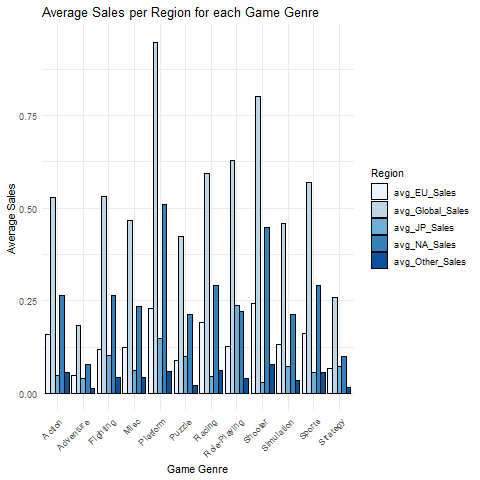

In [236]:
%%R

# Reshape data for plotting
average_sales_long <- average_sales %>%
    gather(key = "Region", value = "Average_Sales", -Genre)

# Set the plot size
options(repr.plot.width=10, repr.plot.height=6)

# Plot
ggplot(average_sales_long, aes(x = Genre, y = Average_Sales, fill = Region)) +
    geom_bar(colour = "black", stat = "identity", position = "dodge", width = 0.9) +
    scale_fill_brewer(palette = "Blues") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = "Average Sales per Region for each Game Genre",
         x = "Game Genre",
         y = "Average Sales")

### Prosječna prodaja prema regionu za platforme

In [175]:
%%R

# Calculate average sales per region for each game platform
average_sales_platform <- games %>%
    group_by(Platform) %>%
    summarise(
        avg_NA_Sales = mean(NA_Sales),
        avg_EU_Sales = mean(EU_Sales),
        avg_JP_Sales = mean(JP_Sales),
        avg_Other_Sales = mean(Other_Sales),
        avg_Global_Sales = mean(Global_Sales)
    )

In [176]:
%%R

# Pivot the data to create a table with average sales per platform and region
average_sales_platform_table <- games %>%
  group_by(Platform) %>%
  summarise(
    avg_NA_Sales = mean(NA_Sales) * 1000000,
    avg_EU_Sales = mean(EU_Sales) * 1000000,
    avg_JP_Sales = mean(JP_Sales) * 1000000,
    avg_Other_Sales = mean(Other_Sales) * 1000000,
    avg_Global_Sales = mean(Global_Sales) * 1000000
  )

# Print the table
kable(average_sales_platform_table, caption = "Average Sales of Each Platform per Region")



Table: Average Sales of Each Platform per Region

|Platform | avg_NA_Sales| avg_EU_Sales| avg_JP_Sales| avg_Other_Sales| avg_Global_Sales|
|:--------|------------:|------------:|------------:|---------------:|----------------:|
|2600     |    681203.01|    41127.820|       0.0000|       6842.1053|        729924.81|
|3DO      |         0.00|        0.000|   33333.3333|          0.0000|         33333.33|
|3DS      |    154950.88|   114970.530|  191257.3674|      24813.3595|        486168.96|
|DC       |    104423.08|    32500.000|  164615.3846|       5192.3077|        307115.38|
|DS       |    180633.38|    89990.754|   81169.6718|      27984.2811|        380254.28|
|GB       |   1166530.61|   487959.184|  868571.4286|      83673.4694|       2606632.65|
|GBA      |    228150.85|    91545.012|   57579.0754|       9403.8929|        387469.59|
|GC       |    240035.97|    69622.302|   38812.9496|       9316.5468|        358561.15|
|GEN      |    713703.70|   204444.444|   98888.8889|     

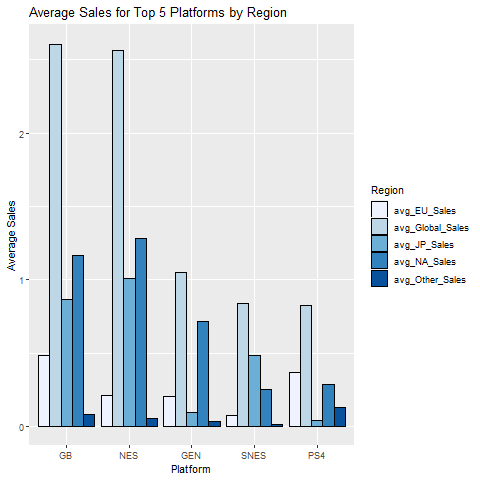

In [177]:
%%R

# Select the top 5 platforms
top_platforms <- average_sales_platform %>%
  top_n(5, avg_Global_Sales) %>%
  arrange(desc(avg_Global_Sales))

# Reshape the data for plotting
plot_data <- top_platforms %>%
  pivot_longer(cols = starts_with("avg_"), names_to = "Region", values_to = "Average_Sales") %>%
  mutate(Platform = factor(Platform, levels = top_platforms$Platform))

# Plot the data
ggplot(plot_data, aes(x = Platform, y = Average_Sales, fill = Region)) +
  geom_bar(color ="black", stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "Blues") +
  xlab("Platform") +
  ylab("Average Sales") +
  ggtitle("Average Sales for Top 5 Platforms by Region")

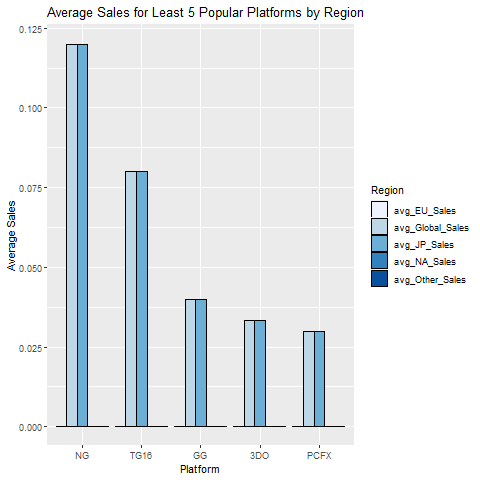

In [178]:
%%R

# Select the bottom 5 platforms
bottom_platforms <- average_sales_platform %>%
  top_n(5, -avg_Global_Sales) %>%
  arrange(desc(avg_Global_Sales))

# Reshape the data for plotting
plot_data <- bottom_platforms %>%
  pivot_longer(cols = starts_with("avg_"), names_to = "Region", values_to = "Average_Sales") %>%
  mutate(Platform = factor(Platform, levels = bottom_platforms$Platform))

# Plot the data
ggplot(plot_data, aes(x = Platform, y = Average_Sales, fill = Region)) +
  geom_bar(color ="black", stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "Blues") +
  xlab("Platform") +
  ylab("Average Sales") +
  ggtitle("Average Sales for Least 5 Popular Platforms by Region")

In [179]:
%%R

min_year <- min(games$Year, na.rm = TRUE)
max_year <- max(games$Year, na.rm = TRUE)

print(paste("The dataset spans from", min_year, "to", max_year))

[1] "The dataset spans from 1980 to 2020"


In [180]:
%%R

# Create Decade variable
games <- games %>%
  mutate(Decade = 10 * (Year %/% 10)) %>%
  drop_na(Decade)

In [197]:
%%R

# Pivot the data to create a table with average sales per platform, region, and decade
average_sales_platform_decade_table <- games %>%
  group_by(Platform, Decade) %>%
  summarise(
    avg_NA_Sales = mean(NA_Sales) * 1000000,
    avg_EU_Sales = mean(EU_Sales) * 1000000,
    avg_JP_Sales = mean(JP_Sales) * 1000000,
    avg_Other_Sales = mean(Other_Sales) * 1000000,
    avg_Global_Sales = mean(Global_Sales) * 1000000
  )

# Print the table
kable(average_sales_platform_decade_table, caption = "Average Sales of Each Platform per Region per Decade")



`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.


Table: Average Sales of Each Platform per Region per Decade

|Platform | Decade| avg_NA_Sales| avg_EU_Sales| avg_JP_Sales| avg_Other_Sales| avg_Global_Sales|
|:--------|------:|------------:|------------:|------------:|---------------:|----------------:|
|2600     |   1980|    696379.31|    41896.552|       0.0000|       7241.3793|        746293.10|
|3DO      |   1990|         0.00|        0.000|   33333.3333|          0.0000|         33333.33|
|3DS      |   2010|    156060.00|   116600.000|  194600.0000|      25100.0000|        492560.00|
|DC       |   1990|    138095.24|    42857.143|  219047.6190|       6666.6667|        407619.05|
|DC       |   2000|     81612.90|    25483.871|  127741.9355|       4193.5484|        239032.26|
|DS       |   1980|         0.00|        0.000|   20000.0000|          0.0000|         20000.00|
|DS       |   2000|    201416.20|   101243.043|   90970.9338|     

In [209]:
%%R

# Select the top 5 platforms per decade
top_platforms_decade <- average_sales_platform_decade_table %>%
  group_by(Decade) %>%
  top_n(8, avg_Global_Sales) %>%
  arrange(desc(avg_Global_Sales))

# Reshape the data for plotting
plot_data_decade <- top_platforms_decade %>%
  pivot_longer(cols = starts_with("avg_"), names_to = "Region", values_to = "Average_Sales")

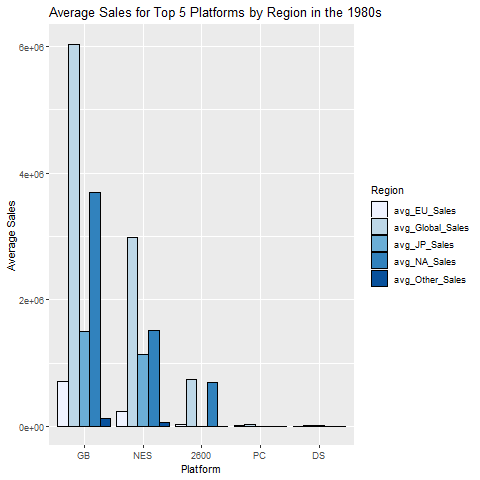

In [214]:
%%R

# Select the data for the 1980s
plot_data_1980s <- plot_data_decade %>%
  filter(Decade == 1980)

# Plot the data for the 1980s
ggplot(plot_data_1980s, aes(x = reorder(Platform, -Average_Sales), y = Average_Sales, fill = Region)) +
  geom_bar(color ="black", stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "Blues") +
  xlab("Platform") +
  ylab("Average Sales") +
  ggtitle("Average Sales for Top 5 Platforms by Region in the 1980s")

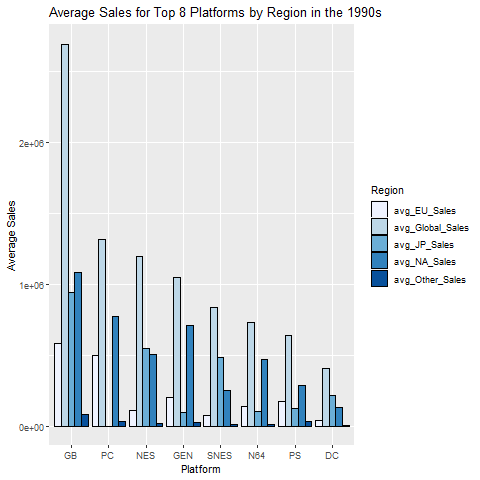

In [215]:
%%R

# Select the data for the 1990s
plot_data_1990s <- plot_data_decade %>%
  filter(Decade == 1990)

# Plot the data for the 1990s
ggplot(plot_data_1990s, aes(x = reorder(Platform, -Average_Sales), y = Average_Sales, fill = Region)) +
  geom_bar(color ="black", stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "Blues") +
  xlab("Platform") +
  ylab("Average Sales") +
  ggtitle("Average Sales for Top 8 Platforms by Region in the 1990s")

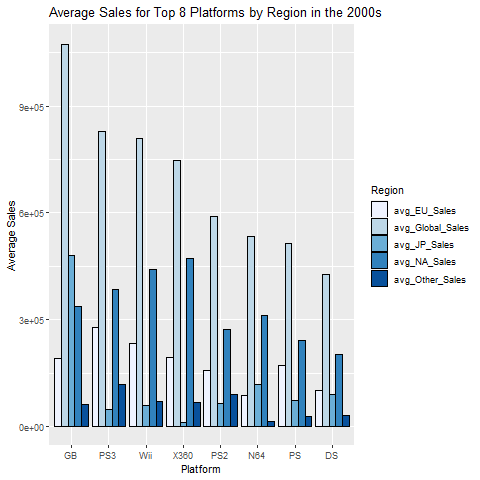

In [216]:
%%R

# Select the data for the 2000s
plot_data_2000s <- plot_data_decade %>%
  filter(Decade == 2000)

# Plot the data for the 2000s
ggplot(plot_data_2000s, aes(x = reorder(Platform, -Average_Sales), y = Average_Sales, fill = Region)) +
  geom_bar(color ="black", stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "Blues") +
  xlab("Platform") +
  ylab("Average Sales") +
  ggtitle("Average Sales for Top 8 Platforms by Region in the 2000s")

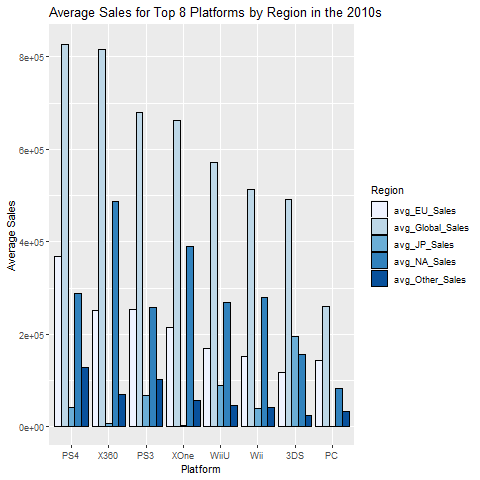

In [217]:
%%R

# Select the data for the 2010s
plot_data_2010s <- plot_data_decade %>%
  filter(Decade == 2010)

# Plot the data for the 2010s
ggplot(plot_data_2010s, aes(x = reorder(Platform, -Average_Sales), y = Average_Sales, fill = Region)) +
  geom_bar(color ="black", stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "Blues") +
  xlab("Platform") +
  ylab("Average Sales") +
  ggtitle("Average Sales for Top 8 Platforms by Region in the 2010s")

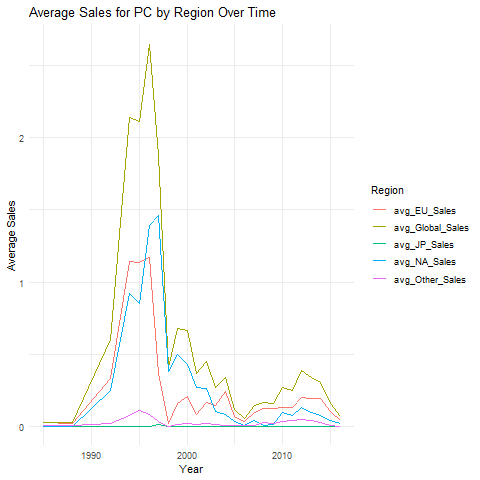

In [204]:
%%R

# Filter for 'PC', group by 'Year' and calculate average sales
average_sales_PC_year <- games %>%
  filter(Platform == "PC") %>%
  group_by(Year) %>%
  summarise(
    avg_NA_Sales = mean(NA_Sales),
    avg_EU_Sales = mean(EU_Sales),
    avg_JP_Sales = mean(JP_Sales),
    avg_Other_Sales = mean(Other_Sales),
    avg_Global_Sales = mean(Global_Sales)
  )

# Reshape the data for plotting
plot_data_PC <- average_sales_PC_year %>%
  pivot_longer(cols = starts_with("avg_"), names_to = "Region", values_to = "Average_Sales")

# Plot the data
ggplot(plot_data_PC, aes(x = Year, y = Average_Sales, color = Region)) +
  geom_line() +
  labs(x = "Year", y = "Average Sales", color = "Region") +
  ggtitle("Average Sales for PC by Region Over Time") +
  theme_minimal()

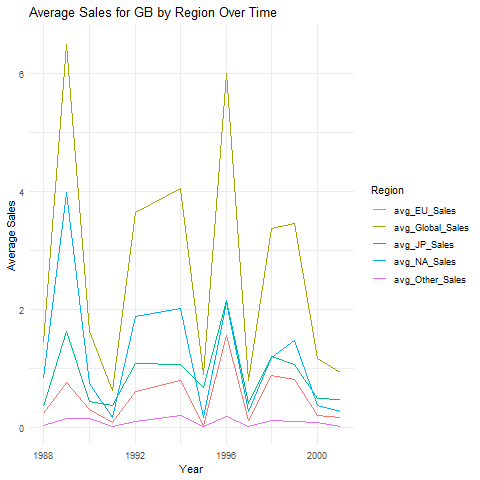

In [206]:
%%R

# Filter for 'GB', group by 'Year' and calculate average sales
average_sales_GB_year <- games %>%
  filter(Platform == "GB") %>%
  group_by(Year) %>%
  summarise(
    avg_NA_Sales = mean(NA_Sales),
    avg_EU_Sales = mean(EU_Sales),
    avg_JP_Sales = mean(JP_Sales),
    avg_Other_Sales = mean(Other_Sales),
    avg_Global_Sales = mean(Global_Sales)
  )

# Reshape the data for plotting
plot_data_GB <- average_sales_GB_year %>%
  pivot_longer(cols = starts_with("avg_"), names_to = "Region", values_to = "Average_Sales")

# Plot the data
ggplot(plot_data_GB, aes(x = Year, y = Average_Sales, color = Region)) +
  geom_line() +
  labs(x = "Year", y = "Average Sales", color = "Region") +
  ggtitle("Average Sales for GB by Region Over Time") +
  theme_minimal()

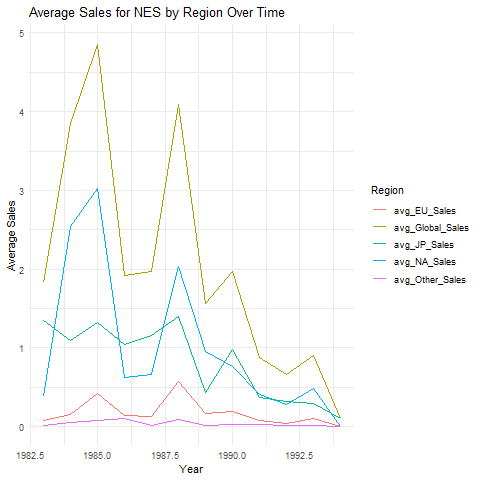

In [218]:
%%R

# Filter for 'NES', group by 'Year' and calculate average sales
average_sales_NES_year <- games %>%
  filter(Platform == "NES") %>%
  group_by(Year) %>%
  summarise(
    avg_NA_Sales = mean(NA_Sales),
    avg_EU_Sales = mean(EU_Sales),
    avg_JP_Sales = mean(JP_Sales),
    avg_Other_Sales = mean(Other_Sales),
    avg_Global_Sales = mean(Global_Sales)
  )

# Reshape the data for plotting
plot_data_NES <- average_sales_NES_year %>%
  pivot_longer(cols = starts_with("avg_"), names_to = "Region", values_to = "Average_Sales")

# Plot the data
ggplot(plot_data_NES, aes(x = Year, y = Average_Sales, color = Region)) +
  geom_line() +
  labs(x = "Year", y = "Average Sales", color = "Region") +
  ggtitle("Average Sales for NES by Region Over Time") +
  theme_minimal()

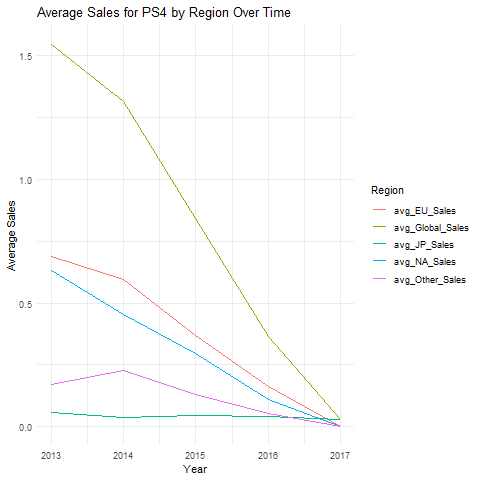

In [220]:
%%R

# Filter for 'PS4', group by 'Year' and calculate average sales
average_sales_PS4_year <- games %>%
  filter(Platform == "PS4") %>%
  group_by(Year) %>%
  summarise(
    avg_NA_Sales = mean(NA_Sales),
    avg_EU_Sales = mean(EU_Sales),
    avg_JP_Sales = mean(JP_Sales),
    avg_Other_Sales = mean(Other_Sales),
    avg_Global_Sales = mean(Global_Sales)
  )

# Reshape the data for plotting
plot_data_PS4 <- average_sales_PS4_year %>%
  pivot_longer(cols = starts_with("avg_"), names_to = "Region", values_to = "Average_Sales")

# Plot the data
ggplot(plot_data_PS4, aes(x = Year, y = Average_Sales, color = Region)) +
  geom_line() +
  labs(x = "Year", y = "Average Sales", color = "Region") +
  ggtitle("Average Sales for PS4 by Region Over Time") +
  theme_minimal()

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


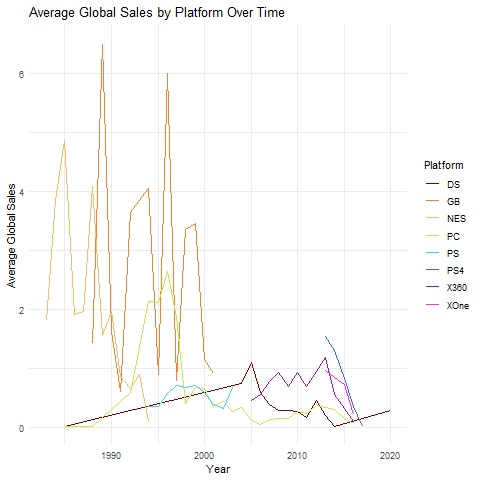

In [228]:
%%R

# Filter for 'PS4', 'PC', 'GB', 'NES', 'X360', group by 'Year' and calculate average global sales
average_sales_platform_year <- games %>%
  filter(Platform %in% c("PS4", "PC", "GB", "NES", "X360", "PS", "XOne", "DS")) %>%
  group_by(Year, Platform) %>%
  summarise(
    avg_Global_Sales = mean(Global_Sales, na.rm = TRUE)
  )

# Plot the data
ggplot(average_sales_platform_year, aes(x = Year, y = avg_Global_Sales, color = Platform)) +
  geom_line() +
  scale_color_manual(values = c("PS4" = "#4363d8", "PC" = "#bfef45", "GB" = "#f58231", "NES" = "#f4bd6a", "X360" = "#911eb4", "PS" = "#42d4f4", "XOne" = "#f032e6", "DS" = "#800000")) +
  labs(x = "Year", y = "Average Global Sales", color = "Platform") +
  ggtitle("Average Global Sales by Platform Over Time") +
  theme_minimal()

`summarise()` has grouped output by 'Decade'. You can override using the
`.groups` argument.


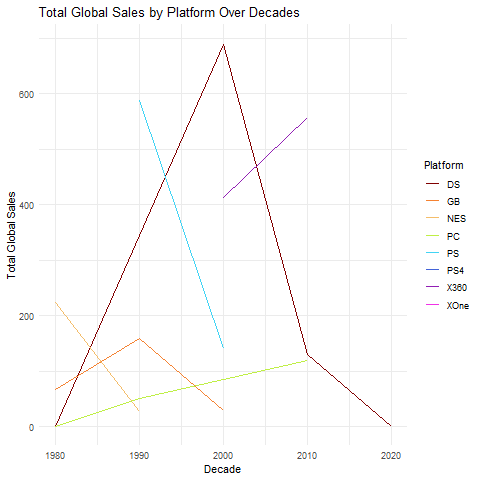

In [233]:
%%R

# Filter for 'PS4', 'PC', 'GB', 'NES', 'X360', 'PS', 'XOne', 'DS', group by 'Decade' and 'Platform' 
# and calculate total global sales
total_sales_platform_decade <- games %>%
  filter(Platform %in% c("PS4", "PC", "GB", "NES", "X360", "PS", "XOne", "DS")) %>%
  group_by(Decade, Platform) %>%
  summarise(
    Total_Global_Sales = sum(Global_Sales, na.rm = TRUE)
  )

# Plot the data
ggplot(total_sales_platform_decade, aes(x = Decade, y = Total_Global_Sales, color = Platform)) +
  geom_line() +
  scale_color_manual(values = c("PS4" = "#4363d8", "PC" = "#bfef45", "GB" = "#f58231", "NES" = "#f4bd6a", "X360" = "#911eb4", "PS" = "#42d4f4", "XOne" = "#f032e6", "DS" = "#800000")) +
  labs(x = "Decade", y = "Total Global Sales", color = "Platform") +
  ggtitle("Total Global Sales by Platform Over Decades") +
  theme_minimal()

In [ ]:
%%R

# Select top 10 games
top_games <- games %>%
  arrange(desc(Global_Sales)) %>%
  slice_head(n = 10)

# Print the top 10 games
print(top_games)



   Rank                      Name Platform Year        Genre Publisher NA_Sales
1     1                Wii Sports      Wii 2006       Sports  Nintendo    41.49
2     2         Super Mario Bros.      NES 1985     Platform  Nintendo    29.08
3     3            Mario Kart Wii      Wii 2008       Racing  Nintendo    15.85
4     4         Wii Sports Resort      Wii 2009       Sports  Nintendo    15.75
5     5  Pokemon Red/Pokemon Blue       GB 1996 Role-Playing  Nintendo    11.27
6     6                    Tetris       GB 1989       Puzzle  Nintendo    23.20
7     7     New Super Mario Bros.       DS 2006     Platform  Nintendo    11.38
8     8                  Wii Play      Wii 2006         Misc  Nintendo    14.03
9     9 New Super Mario Bros. Wii      Wii 2009     Platform  Nintendo    14.59
10   10                 Duck Hunt      NES 1984      Shooter  Nintendo    26.93
   EU_Sales JP_Sales Other_Sales Global_Sales cluster Decade
1     29.02     3.77        8.46        82.74       8   200

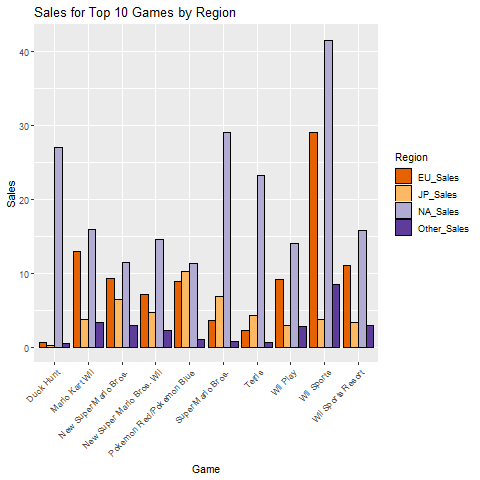

In [ ]:
%%R

# Reshape the data for plotting
plot_data_games <- top_games %>%
  dplyr::select(Name, NA_Sales, EU_Sales, JP_Sales, Other_Sales) %>%
  pivot_longer(cols = -Name, names_to = "Region", values_to = "Sales")

# Plot the data
ggplot(plot_data_games, aes(x = Name, y = Sales, fill = Region)) +
  geom_bar(color="black", stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "PuOr") +
  xlab("Game") +
  ylab("Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Sales for Top 10 Games by Region")

### Klasterizacija
+ Klasterizacija igara na osnovu prodaje za regije
+ K-Means with silhouette method

In [285]:
%%R

# Extract the sales data for clustering
sales_data <- na.omit(games[, c("NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales")])

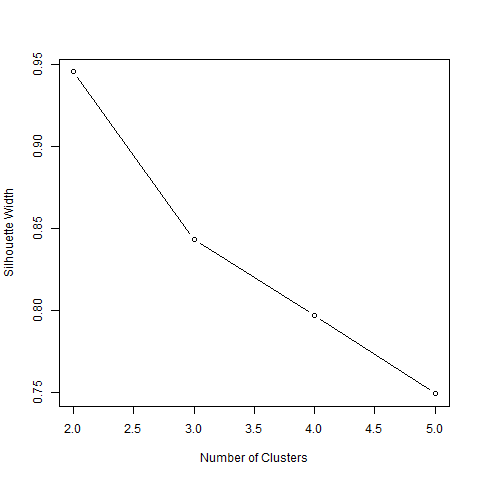

In [286]:
%%R

# Determine the optimal number of clusters using silhouette method
sil_width <- c(NA)
for (k in 2:5) {
  kmeans_model <- kmeans(sales_data, centers = k)
  cluster_assignments <- kmeans_model$cluster
  sil_width[k] <- cluster.stats(dist(sales_data), cluster_assignments)$avg.silwidth
}

# Plot the silhouette width for different numbers of clusters
plot(2:5, sil_width[2:5], type = "b", xlab = "Number of Clusters", ylab = "Silhouette Width")

In [287]:
%%R

# Determine the optimal number of clusters based on the highest silhouette width
optimal_clusters <- which.max(sil_width)
cat("Optimal number of clusters:", optimal_clusters, "\n")

Optimal number of clusters: 2 


In [288]:
%%R

# Perform K-means clustering with the optimal number of clusters
kmeans_model <- kmeans(sales_data, centers = optimal_clusters)

# Add cluster labels to the dataset
games$Cluster <- as.factor(kmeans_model$cluster)


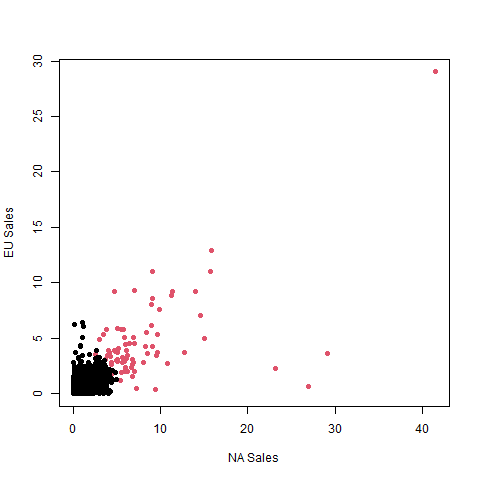

In [302]:
%%R

# Plot the clusters
plot(sales_data[, "NA_Sales"], sales_data[, "EU_Sales"], col = kmeans_model$cluster,
     pch = 19, xlab = "NA Sales", ylab = "EU Sales")

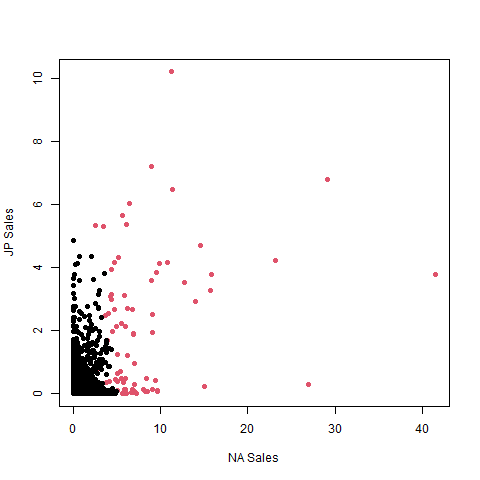

In [303]:
%%R

# Plot the clusters
plot(sales_data[, "NA_Sales"], sales_data[, "JP_Sales"], col = kmeans_model$cluster,
     pch = 19, xlab = "NA Sales", ylab = "JP Sales")

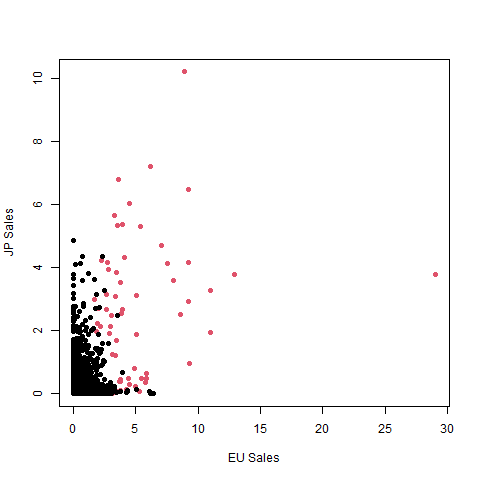

In [304]:
%%R

# Plot the clusters
plot(sales_data[, "EU_Sales"], sales_data[, "JP_Sales"], col = kmeans_model$cluster,
     pch = 19, xlab = "EU Sales", ylab = "JP Sales")

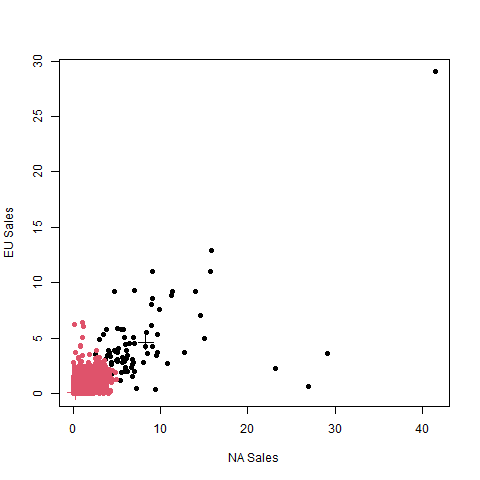

In [ ]:
%%R

# Extract cluster centroids
centroids <- kmeans_model$centers

# Plot the cluster centroids
plot(sales_data[, "NA_Sales"], sales_data[, "EU_Sales"], col = kmeans_model$cluster,
     pch = 19, xlab = "NA Sales", ylab = "EU Sales")

# Add cluster centroids to the plot
points(centroids[, "NA_Sales"], centroids[, "EU_Sales"], col = 1:max(kmeans_model$cluster),
       pch = 3, cex = 2)

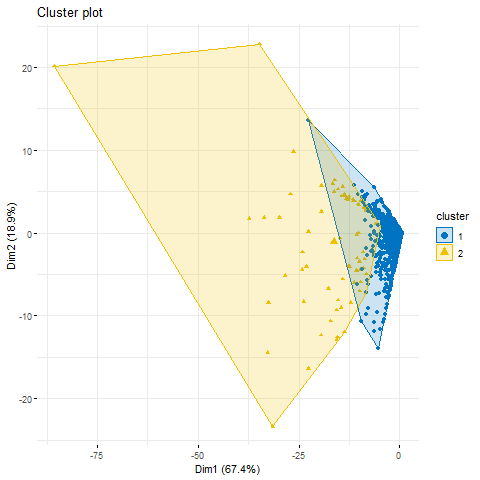

In [289]:
%%R

# Visualize the clusters using fviz_cluster()
fviz_cluster(kmeans_model, 
             data = sales_data,
             geom = "point",
             ellipse.type = "convex",
             palette = "jco",
             ggtheme = theme_minimal())

  cluster  size ave.sil.width
1       1 16521          0.95
2       2    77          0.19


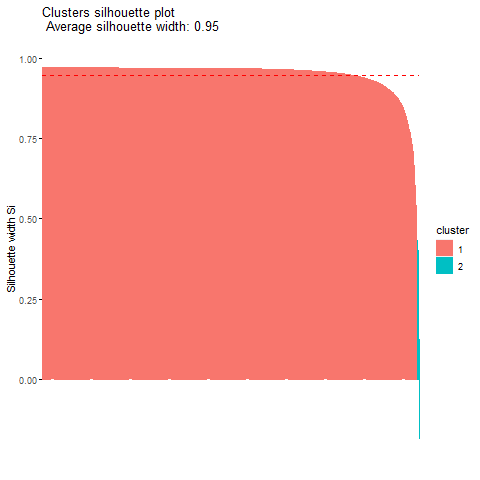

In [ ]:
%%R

# Compute silhouette widths
sil_width <- silhouette(kmeans_model$cluster, dist(sales_data))

# Visualize the silhouette widths using silhouette plot
fviz_silhouette(sil_width, print.summary = TRUE)

+ Uvid u karakteristike klastera kroz sažete statistike

In [299]:
%%R

# Add cluster assignments to the data
sales_data$Cluster <- kmeans_model$cluster

# Compute summary statistics for each cluster
cluster_summaries <- by(sales_data, sales_data$Cluster, summary)
print(cluster_summaries)

sales_data$Cluster: 1
    NA_Sales         EU_Sales         JP_Sales        Other_Sales     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0800   Median :0.0200   Median :0.00000   Median :0.01000  
 Mean   :0.2274   Mean   :0.1262   Mean   :0.06869   Mean   :0.04193  
 3rd Qu.:0.2300   3rd Qu.:0.1100   3rd Qu.:0.04000   3rd Qu.:0.03000  
 Max.   :4.9800   Max.   :6.4200   Max.   :4.87000   Max.   :7.53000  
    Cluster 
 Min.   :1  
 1st Qu.:1  
 Median :1  
 Mean   :1  
 3rd Qu.:1  
 Max.   :1  
------------------------------------------------------------ 
sales_data$Cluster: 2
    NA_Sales         EU_Sales         JP_Sales       Other_Sales    
 Min.   : 2.550   Min.   : 0.400   Min.   : 0.000   Min.   : 0.080  
 1st Qu.: 5.030   1st Qu.: 2.770   1st Qu.: 0.280   1st Qu.: 0.630  
 Median : 6.420   Median : 3.690   Median : 1.910   Median : 0.980  
 Mean   : 8.292   Mean   : 4.6

+ Veličina klastera

In [300]:
%%R

# Print cluster sizes
print(table(sales_data$Cluster))


    1     2 
16250    77 


+ Centroidi

In [301]:
%%R

# Print cluster centers
print(kmeans_model$centers)

   NA_Sales  EU_Sales   JP_Sales Other_Sales
1 0.2273797 0.1261828 0.06868677  0.04193415
2 8.2923377 4.6577922 2.18363636  1.39714286


4. Suma kvadrata

In [ ]:
%%R

# Print total within sum of squares
print(kmeans_model$tot.withinss)

[1] 10442.81


### Proučavanje sažetih statističkih podataka ili frekvencijskih brojanja za svaku kategoričku varijablu unutar svakog klastera
+ Žanr

In [292]:
%%R

# Add the cluster labels to your original dataset
games$Cluster <- kmeans_model$cluster

# Compute frequency counts for Genre within each cluster
genre_counts <- with(games, table(Genre, Cluster))
print(genre_counts)

              Cluster
Genre             1    2
  Action       3244    9
  Adventure    1275    1
  Fighting      835    1
  Misc         1703    7
  Platform      862   14
  Puzzle        568    3
  Racing       1218    8
  Role-Playing 1461   10
  Shooter      1264   18
  Simulation    849    2
  Sports       2300    4
  Strategy      671    0


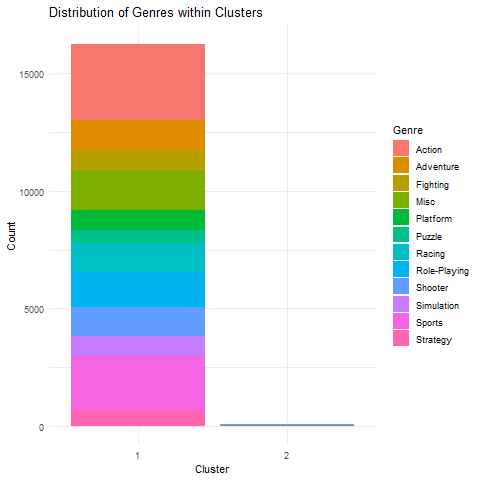

In [293]:
%%R

# Convert the table to a data frame for easier plotting
genre_counts_df <- as.data.frame.table(genre_counts)

# Rename the columns for better understanding
names(genre_counts_df) <- c("Genre", "Cluster", "Count")

# Convert Cluster to factor for proper ordering in the plot
genre_counts_df$Cluster <- as.factor(genre_counts_df$Cluster)

# Load ggplot2 for plotting
library(ggplot2)

# Create the stacked bar plot
ggplot(genre_counts_df, aes(fill=Genre, y=Count, x=Cluster)) +
  geom_bar(position="stack", stat="identity") +
  labs(x = "Cluster", y = "Count", fill = "Genre") +
  theme_minimal() +
  ggtitle("Distribution of Genres within Clusters")

+ Platforma

In [ ]:
%%R

# Compute frequency counts for Platform within each cluster
platform_counts <- with(games, table(Platform, Cluster))
print(platform_counts)

        Cluster
Platform    1    2
    2600    1  132
    3DO     0    3
    3DS     5  504
    DC      0   52
    DS     11 2152
    GB      6   92
    GBA     2  820
    GC      0  556
    GEN     0   27
    GG      0    1
    N64     3  316
    NES     4   94
    NG      0   12
    PC      0  960
    PCFX    0    1
    PS      2 1194
    PS2     4 2157
    PS3     8 1321
    PS4     2  334
    PSP     0 1213
    PSV     0  413
    SAT     0  173
    SCD     0    6
    SNES    3  236
    TG16    0    2
    Wii    11 1314
    WiiU    0  143
    WS      0    6
    X360   14 1251
    XB      1  823
    XOne    0  213


+ Proizvođač

In [ ]:
%%R

# Compute frequency counts for Publisher within each cluster
publisher_counts <- with(games, table(Publisher, Cluster))
print(publisher_counts)

                                        Cluster
Publisher                                   1    2
  10TACLE Studios                           0    3
  1C Company                                0    3
  20th Century Fox Video Games              0    5
  2D Boy                                    0    1
  3DO                                       0   36
  49Games                                   0    1
  505 Games                                 0  192
  5pb                                       0   61
  7G//AMES                                  0    4
  989 Sports                                0    1
  989 Studios                               0   14
  Abylight                                  0    1
  Acclaim Entertainment                     0  184
  Accolade                                  0    3
  Ackkstudios                               0   10
  Acquire                                   0   13
  Activision                               12  963
  Activision Blizzard             



+ Identifikacija najboljih 15 izdavača i platformi, a zatim ograničavanje frekvencijskih tablica na te kategorije:

+ Za platformu




In [290]:
%%R

# Compute frequency counts for all Platforms
platform_counts_all <- table(games$Platform)

# Identify the top 15 platforms
top_platforms <- names(platform_counts_all)[order(platform_counts_all, decreasing = TRUE)[1:15]]

# Compute frequency counts for Platform within each cluster, focusing on the top 15 platforms
platform_counts <- with(games[games$Platform %in% top_platforms, ], table(Platform, Cluster))
print(platform_counts)

        Cluster
Platform    1    2
    3DS   495    5
    DS   2122   11
    GBA   809    2
    GC    542    0
    N64   313    3
    PC    943    0
    PS   1187    2
    PS2  2123    4
    PS3  1296    8
    PS4   334    2
    PSP  1197    0
    PSV   412    0
    Wii  1279   11
    X360 1221   14
    XB    802    1


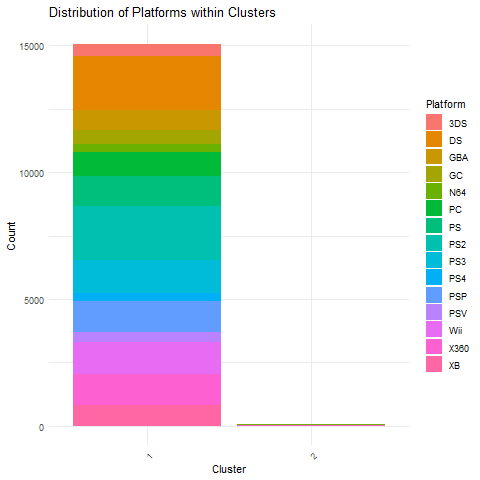

In [294]:
%%R

# Convert the table to a data frame for easier plotting
platform_counts_df <- as.data.frame.table(platform_counts)

# Rename the columns for better understanding
names(platform_counts_df) <- c("Platform", "Cluster", "Count")

# Convert Cluster to factor for proper ordering in the plot
platform_counts_df$Cluster <- as.factor(platform_counts_df$Cluster)

# Load ggplot2 for plotting
library(ggplot2)

# Create the stacked bar plot
ggplot(platform_counts_df, aes(fill=Platform, y=Count, x=Cluster)) +
  geom_bar(position="stack", stat="identity") +
  labs(x = "Cluster", y = "Count", fill = "Platform") +
  theme_minimal() +
  ggtitle("Distribution of Platforms within Clusters") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Angle the x-axis labels for better readability

+ Za proizvođača:

In [291]:
%%R

# Compute frequency counts for all Publishers
publisher_counts_all <- table(games$Publisher)

# Identify the top 15 publishers
top_publishers <- names(publisher_counts_all)[order(publisher_counts_all, decreasing = TRUE)[1:15]]

# Compute frequency counts for Publisher within each cluster, focusing on the top 15 publishers
publisher_counts <- with(games[games$Publisher %in% top_publishers, ], table(Publisher, Cluster))
print(publisher_counts)

                                        Cluster
Publisher                                   1    2
  Activision                              954   12
  Atari                                   346    1
  Capcom                                  376    0
  Electronic Arts                        1339    0
  Konami Digital Entertainment            823    0
  Namco Bandai Games                      928    0
  Nintendo                                653   43
  Sega                                    632    0
  Sony Computer Entertainment             678    4
  Square Enix                             231    0
  Take-Two Interactive                    404    8
  Tecmo Koei                              338    0
  THQ                                     712    0
  Ubisoft                                 916    2
  Warner Bros. Interactive Entertainment  217    0


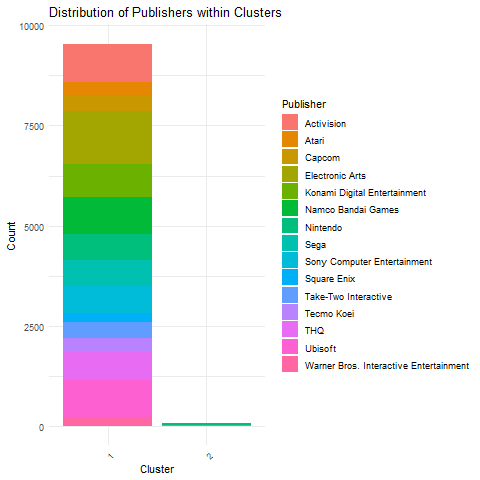

In [295]:
%%R

# Convert the table to a data frame for easier plotting
publisher_counts_df <- as.data.frame.table(publisher_counts)

# Rename the columns for better understanding
names(publisher_counts_df) <- c("Publisher", "Cluster", "Count")

# Convert Cluster to factor for proper ordering in the plot
publisher_counts_df$Cluster <- as.factor(publisher_counts_df$Cluster)

# Load ggplot2 for plotting
library(ggplot2)

# Create the stacked bar plot
ggplot(publisher_counts_df, aes(fill=Publisher, y=Count, x=Cluster)) +
  geom_bar(position="stack", stat="identity") +
  labs(x = "Cluster", y = "Count", fill = "Publisher") +
  theme_minimal() +
  ggtitle("Distribution of Publishers within Clusters") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Angle the x-axis labels for better readability

+ Klasterizacija na osnovu globalne prodaje

In [ ]:
%%R

# Extract the "Global_Sales" column as a matrix or data frame
global_sales <- as.matrix(games$Global_Sales)

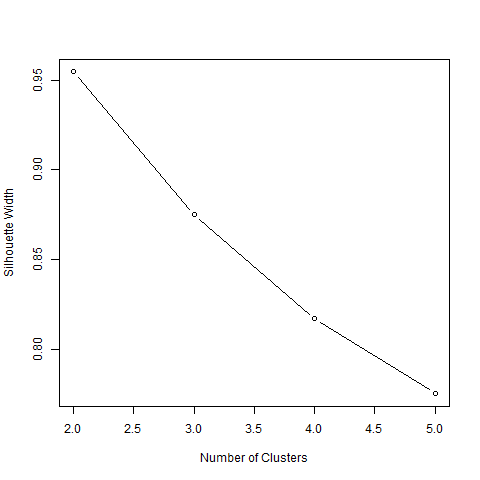

In [ ]:
%%R

# Perform K-means clustering with different numbers of clusters
sil_width <- c(NA)
for (k in 2:5) {
  kmeans_model <- kmeans(global_sales, centers = k)
  cluster_assignments <- kmeans_model$cluster
  dist_matrix <- dist(global_sales)
  sil_width[k] <- cluster.stats(dist_matrix, cluster_assignments)$avg.silwidth
}

# Plot the silhouette width for different numbers of clusters
plot(2:5, sil_width[2:5], type = "b", xlab = "Number of Clusters", ylab = "Silhouette Width")

In [ ]:
%%R

# Determine the optimal number of clusters
optimal_clusters <- which.max(sil_width)
cat("Optimal number of clusters:", optimal_clusters, "\n")

Optimal number of clusters: 2 


In [ ]:
%%R

# Convert global_sales to a matrix
global_sales_matrix <- matrix(global_sales, ncol = 1)

# Perform K-means clustering with the optimal number of clusters
kmeans_model <- kmeans(global_sales_matrix, centers = optimal_clusters)

# Add cluster labels to the dataset
games$Cluster <- as.factor(kmeans_model$cluster)

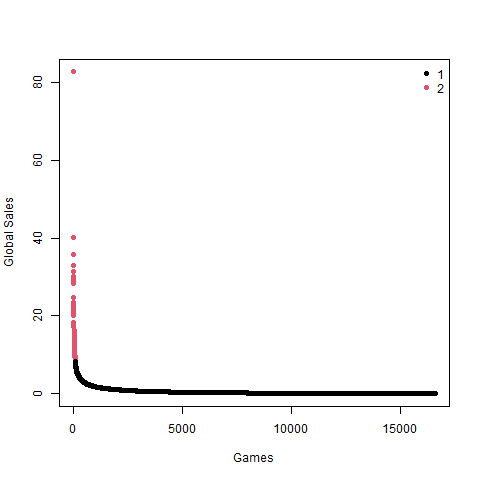

In [ ]:
%%R

# Plot the clusters
plot(global_sales, col = kmeans_model$cluster, pch = 19, xlab = "Games", ylab = "Global Sales")
legend("topright", legend = levels(games$Cluster), col = 1:optimal_clusters, pch = 19, bty = "n")

  cluster  size ave.sil.width
1       1    82          0.41
2       2 16516          0.96


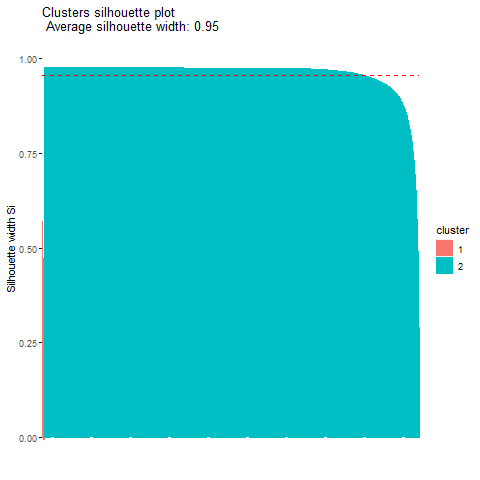

In [ ]:
%%R

# Compute silhouette widths
sil_width <- silhouette(kmeans_model$cluster, dist(global_sales))

# Visualize the silhouette widths using silhouette plot
fviz_silhouette(sil_width, print.summary = TRUE)

+ Globalna prodaja i žanrovi

In [ ]:
%%R

# Create a new data frame with only the relevant columns
games_relevant <- games[, c("Genre", "Global_Sales")]

# Convert the Genre column to dummy variables
genre_dummies <- model.matrix(~Genre-1, data = games_relevant)

# Combine the dummy variables with the Global_Sales column
games_processed <- cbind(genre_dummies, games_relevant$Global_Sales)

# Scale the data
games_processed <- scale(games_processed)

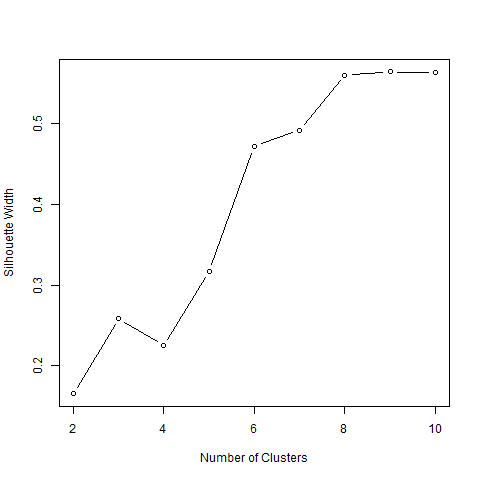

In [ ]:
%%R

# Perform K-means clustering with different numbers of clusters
sil_width <- c(NA)
for (k in 2:10) {  # increased the upper limit to 10 for more granularity
  kmeans_model <- kmeans(games_processed, centers = k)
  cluster_assignments <- kmeans_model$cluster
  dist_matrix <- dist(games_processed)
  sil_width[k] <- cluster.stats(dist_matrix, cluster_assignments)$avg.silwidth
}

# Plot the silhouette width for different numbers of clusters
plot(2:10, sil_width[2:10], type = "b", xlab = "Number of Clusters", ylab = "Silhouette Width")

In [ ]:
%%R

# Determine the optimal number of clusters
optimal_clusters <- which.max(sil_width)
cat("Optimal number of clusters:", optimal_clusters, "\n")

Optimal number of clusters: 9 


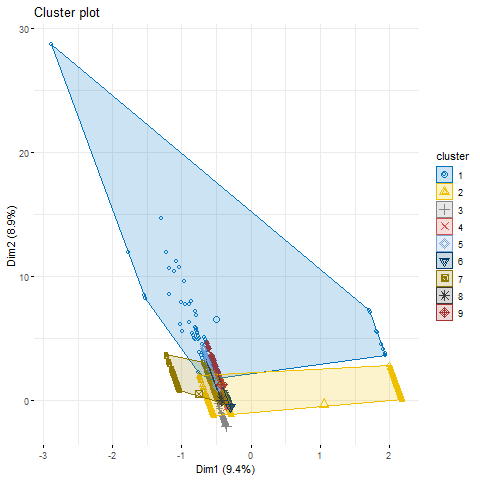

In [ ]:
%%R

# Perform K-means clustering with the optimal number of clusters
kmeans_model <- kmeans(games_processed, centers = optimal_clusters)

# Add cluster labels to the dataset
games$Cluster <- as.factor(kmeans_model$cluster)

# Visualize the clusters using fviz_cluster()
# Need to convert the data back to a data frame and remove the intercept column
games_processed_df <- as.data.frame(games_processed)
games_processed_df$Intercept <- NULL

fviz_cluster(kmeans_model, data = games_processed_df, 
             stand = FALSE, geom = "point", ellipse = TRUE, 
             ggtheme = theme_minimal(), palette = "jco")

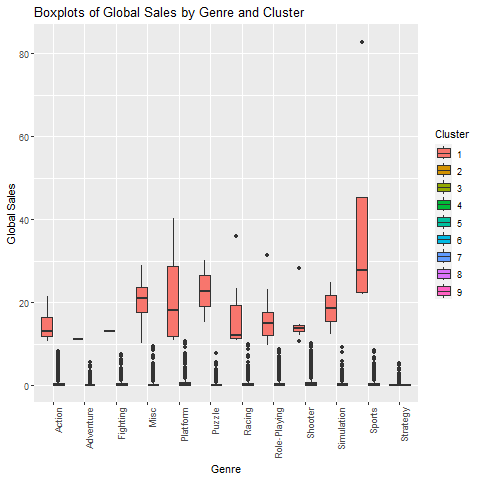

In [ ]:
%%R

# Make sure games$Cluster is a factor
games$Cluster <- as.factor(games$Cluster)

# Create the boxplots
ggplot(games, aes(x = Genre, y = Global_Sales, fill = Cluster)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Boxplots of Global Sales by Genre and Cluster",
       x = "Genre",
       y = "Global Sales",
       fill = "Cluster")